# Avaliação docente em fuzzy
---
### Autor: Matheus Felipe Paixão Honorato
matheuspaixaohonorato@gmail.com
### Sistema desenvolvido para trabalho de conclusão de curso - Sistemas de Informação | Unimontes
### Objetivo: avaliar docentes do centro de educação a distância da Unimontes por meio da lógica fuzzy

In [21]:
import numpy as np
import matplotlib.pyplot as plt

In [22]:
#os parametros utilizados definem funcoes triangulares

#parametros das variáveis de entrada - funcões iguais para todas as variáveis de entrada por isso definidas somente uma vez

parametros_funcao_entrada_baixo = [0, 5, 10]
parametros_funcao_entrada_medio = [7, 15, 20]
parametros_funcao_entrada_alto = [17, 25, 30]

#parametros variável de saída

parametros_funcao_saida_baixo = [5, 10, 15]
parametros_funcao_saida_medio = [20, 25, 30]
parametros_funcao_saida_alto = [17, 35, 40]

#base de regras

#constantes entradas = BAIXO, MEDIO, ALTO

BAIXO = 'baixo'
MEDIO = 'medio'
ALTO = 'alto'

#constantes saída = BAIXA, MEDIA, ALTA

BAIXA = 'baixa'
MEDIA = 'media'
ALTA = 'alta'

#antecedente, antecedente, antecedente, consequente
#cada coluna é uma questao ex: col1 = questao_um, col2 = questao_dois - obs: ultima coluna igual consequente

regras_dimensao_video_aulas = [
    [BAIXO, BAIXO, BAIXA],
    [MEDIO, ALTO, MEDIA],
    [ALTO, ALTO, ALTA]
]

regras_dimensao_atividades_colaborativas = [
    [BAIXO, BAIXO, BAIXO, BAIXA],
    [BAIXO, BAIXO, MEDIO, BAIXA]
]

regras_dimensao_atividades_individuais = [
    [BAIXO, BAIXO, BAIXO, BAIXA],
    [BAIXO, BAIXO, MEDIO, BAIXA]
]

regras_dimensao_foruns_de_discussao = [
    [BAIXO, BAIXO, BAIXO, BAIXA],
    [BAIXO, BAIXO, MEDIO, BAIXA]
]

regras_dimensao_webinars = [
    [BAIXO, BAIXO, BAIXO, BAIXA],
    [BAIXO, BAIXO, MEDIO, BAIXO]
]

regras_dimensao_avaliacoes_presenciais = [
    [BAIXO, BAIXO, BAIXO, BAIXA],
    [BAIXO, BAIXO, MEDIO, BAIXA]
]

regras_dimensao_salas_virtuais = [
    [BAIXO, BAIXO, BAIXO, BAIXA, BAIXA, BAIXA],
    [BAIXO, BAIXO, MEDIO, BAIXA, MEDIA, BAIXA]
]

#cada coluna é a entrada de uma variavel - para as entradas é feito 
#um pré-processamento onde são calculadas as médias ponderadas das respostas
#dos alunos em cada questão daquela dimensao

valores_de_entrada_questoes_dimensao_video_aulas = [5, 2] 
valores_de_entrada_questoes_dimensao_atividades_colaborativas = [5, 3, 7, 5] 
valores_de_entrada_questoes_dimensao_atividades_individuais = [5, 3, 7, 5] 
valores_de_entrada_questoes_dimensao_foruns_de_discussao = [5, 3, 7, 5] 
valores_de_entrada_questoes_dimensao_webinars = [5, 3, 7, 5] 
valores_de_entrada_questoes_dimensao_avaliacoes_presenciais = [5, 3, 7, 5] 
valores_de_entrada_questoes_dimensao_salas_virtuais = [5, 3, 7, 5, 8, 9]          

In [23]:
#geranado lista de valores eixo x das variaveis de entrada

valores_eixo_x_variaveis_de_entrada_funcao_baixo = np.arange(parametros_funcao_entrada_baixo[0], parametros_funcao_entrada_baixo[-1], 0.00001)
valores_eixo_x_variaveis_de_entrada_funcao_medio = np.arange(parametros_funcao_entrada_medio[0], parametros_funcao_entrada_medio[-1], 0.00001)
valores_eixo_x_variaveis_de_entrada_funcao_alto = np.arange(parametros_funcao_entrada_alto[0], parametros_funcao_entrada_alto[-1], 0.00001)

#geranado lista de valores eixo x das variavel de saída

valores_eixo_x_variavel_de_saida_funcao_baixo = np.arange(parametros_funcao_saida_baixo[0], parametros_funcao_saida_baixo[-1], 0.00001)
valores_eixo_x_variavel_de_saida_funcao_medio = np.arange(parametros_funcao_saida_medio[0], parametros_funcao_saida_medio[-1], 0.00001)
valores_eixo_x_variavel_de_saida_funcao_alto = np.arange(parametros_funcao_saida_alto[0], parametros_funcao_saida_alto[-1], 0.00001)

In [24]:
#definição da função de pertinência triangular

def triangular(x, parametros):
    resultado = 0
    a = parametros[0]
    b = parametros[1]
    c = parametros[2]
    
    resultado = max(min((x-a)/(b-a),(c-x)/(c-b)), 0)
    return resultado

In [25]:
def trapezoidal(x, parametros):
    resultado = 0
    a = parametros[0]
    b = parametros[1]
    c = parametros[2]
    d = parametros[3]

    resultado = max(min((x-a)/(b-a),1,(d-x)/(d-c)),0)
    return resultado

Text(0.5,1,'Variável de entrada')

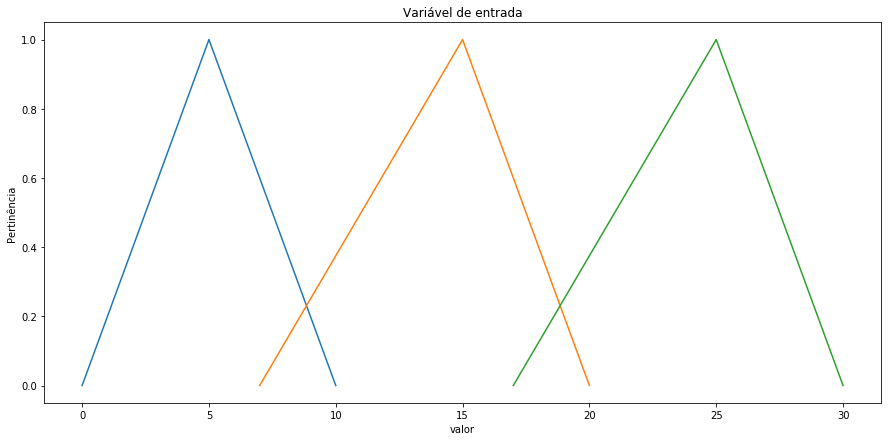

In [26]:
#listas de pertinencias variáveis de entrada 

valores_eixo_y_variaveis_de_entrada_funcao_baixo = []
valores_eixo_y_variaveis_de_entrada_funcao_medio = []
valores_eixo_y_variaveis_de_entrada_funcao_alto = []

#plotando gráfico variáveis de entrada

plt.figure(figsize=(15,7))

#inserindo valores em listas de pertinencia de variáveis de entrada

for x_atual in valores_eixo_x_variaveis_de_entrada_funcao_baixo:
    if(len(parametros_funcao_entrada_baixo) == 3):
        valores_eixo_y_variaveis_de_entrada_funcao_baixo.append(triangular(x_atual, parametros_funcao_entrada_baixo))
    if(len(parametros_funcao_entrada_baixo) == 4):
        valores_eixo_y_variaveis_de_entrada_funcao_baixo.append(trapezoidal(x_atual, parametros_funcao_entrada_baixo))

plt.plot(valores_eixo_x_variaveis_de_entrada_funcao_baixo, valores_eixo_y_variaveis_de_entrada_funcao_baixo)
    
for x_atual in valores_eixo_x_variaveis_de_entrada_funcao_medio:
    if(len(parametros_funcao_entrada_medio) == 3):
        valores_eixo_y_variaveis_de_entrada_funcao_medio.append(triangular(x_atual, parametros_funcao_entrada_medio))
    if(len(parametros_funcao_entrada_medio) == 4):
        valores_eixo_y_variaveis_de_entrada_funcao_medio.append(trapezoidal(x_atual, parametros_funcao_entrada_medio))

plt.plot(valores_eixo_x_variaveis_de_entrada_funcao_medio, valores_eixo_y_variaveis_de_entrada_funcao_medio)
    
for x_atual in valores_eixo_x_variaveis_de_entrada_funcao_alto:
    if(len(parametros_funcao_entrada_alto) == 3):
        valores_eixo_y_variaveis_de_entrada_funcao_alto.append(triangular(x_atual, parametros_funcao_entrada_alto))
    if(len(parametros_funcao_entrada_alto) == 4):
        valores_eixo_y_variaveis_de_entrada_funcao_alto.append(trapezoidal(x_atual, parametros_funcao_entrada_alto))
    
plt.plot(valores_eixo_x_variaveis_de_entrada_funcao_alto, valores_eixo_y_variaveis_de_entrada_funcao_alto)

plt.xlabel("valor")
plt.ylabel("Pertinência")
plt.title("Variável de entrada")

Text(0.5,1,'Variável de saída')

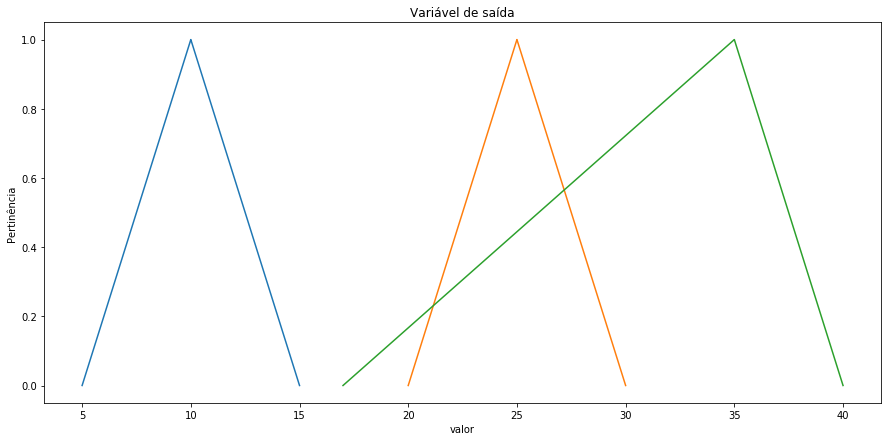

In [27]:
#lista de pertinencias variável de saída 

valores_eixo_y_variavel_de_saida_funcao_baixo = []
valores_eixo_y_variavel_de_saida_funcao_medio = []
valores_eixo_y_variavel_de_saida_funcao_alto = []

#plotando gráfico variáveis de entrada

plt.figure(figsize=(15,7))

#inserindo valores em listas de pertinencia de variável de saida

for x_atual in valores_eixo_x_variavel_de_saida_funcao_baixo:
    valores_eixo_y_variavel_de_saida_funcao_baixo.append(triangular(x_atual, parametros_funcao_saida_baixo))
    
plt.plot(valores_eixo_x_variavel_de_saida_funcao_baixo, valores_eixo_y_variavel_de_saida_funcao_baixo)

for x_atual in valores_eixo_x_variavel_de_saida_funcao_medio:
    valores_eixo_y_variavel_de_saida_funcao_medio.append(triangular(x_atual, parametros_funcao_saida_medio))
    
plt.plot(valores_eixo_x_variavel_de_saida_funcao_medio, valores_eixo_y_variavel_de_saida_funcao_medio)

for x_atual in valores_eixo_x_variavel_de_saida_funcao_alto:
    valores_eixo_y_variavel_de_saida_funcao_alto.append(triangular(x_atual, parametros_funcao_saida_alto))

plt.plot(valores_eixo_x_variavel_de_saida_funcao_alto, valores_eixo_y_variavel_de_saida_funcao_alto)

plt.xlabel("valor")
plt.ylabel("Pertinência")
plt.title("Variável de saída")

In [28]:
def gerar_pertinencias_regra(regra, entradas):
    resultado_regra = []
    for index, coluna in enumerate(regra):
        if(coluna == 'baixo'):
            pertinencia_na_funcao = triangular(entradas[index], parametros_funcao_entrada_baixo)
            resultado_regra.append(pertinencia_na_funcao)
        if(coluna == 'medio'):
            pertinencia_na_funcao = triangular(entradas[index], parametros_funcao_entrada_medio)
            resultado_regra.append(pertinencia_na_funcao)
        if(coluna == 'alto'):
            pertinencia_na_funcao = triangular(entradas[index], parametros_funcao_entrada_alto)
            resultado_regra.append(pertinencia_na_funcao)
    return resultado_regra

In [29]:
def gerar_matriz_de_pertinencias_regras(regras, entradas):
    resultado_regras = []
    for regra_atual in regras:
        resultado_regra = gerar_pertinencias_regra(regra_atual, entradas)
        resultado_regras.append(resultado_regra)
    return resultado_regras

In [30]:
#metodo de inferencia = mamdani | MIN
def inferencia(regras, entradas):
    
    matriz_de_pertinencias_regras = []
    pertinencias_consequente = []
    pertinencias_funcao_baixa = []
    pertinencias_funcao_media = []
    pertinencias_funcao_alta = []
    resultado = []
    
    matriz_de_pertinencias_regras = gerar_matriz_de_pertinencias_regras(regras, entradas)
                
    for linha_atual in matriz_de_pertinencias_regras:
        pertinencias_consequente.append(min(linha_atual))
                
    for index, pertinencia_atual in enumerate(pertinencias_consequente):
        if(regras[index][-1] == 'baixa'):
            pertinencias_funcao_baixa.append(pertinencia_atual)
        if(regras[index][-1] == 'media'):
            pertinencias_funcao_media.append(pertinencia_atual)
        if(regras[index][-1] == 'alta'):
            pertinencias_funcao_alta.append(pertinencia_atual)

    resultado = [max(pertinencias_funcao_baixa),max(pertinencias_funcao_media),max(pertinencias_funcao_alta)]
    
    return resultado

In [31]:
def gerar_regiao_resultante(valores_eixo_y):
    
    plt.plot(valores_eixo_y)

    plt.xlabel("valor")
    plt.ylabel("Pertinência")
    plt.title("Região resulante")

In [32]:
def defuzzificacao(eixo_x_baixa, eixo_x_media, eixo_x_alta, valores_y):
               
    #metodo centroide    
    valores_numerador = []
    valores_denominador = []
    
    numerador = 0
    denominador = 0
    
    for x in eixo_x_baixa:
        if(triangular(x, parametros_funcao_entrada_baixo) <= valores_y[0]):
            valores_numerador.append(x*valores_y[0])
            valores_denominador.append(valores_y[0])
            
    for x in eixo_x_media:
        if(triangular(x, parametros_funcao_entrada_medio) <= valores_y[1]):
            valores_numerador.append(x*valores_y[1])
            valores_denominador.append(valores_y[1])
    
    for x in eixo_x_alta:
        if(triangular(x, parametros_funcao_entrada_alto) <= valores_y[2]):
            valores_numerador.append(x*valores_y[2])
            valores_denominador.append(valores_y[2])

    numerador = sum(valores_numerador)
    denominador = sum(valores_denominador)
        
    if(denominador == 0):
        return 0
        
    gerar_regiao_resultante(valores_denominador)
        
    resultado = numerador/denominador
    
    return resultado

In [33]:
def sistema_fuzzzy():
    resultado_inferencia = inferencia(regras_dimensao_video_aulas, valores_de_entrada_questoes_dimensao_video_aulas)
    print(resultado_inferencia)
    resultado_sistema = defuzzificacao(
        valores_eixo_x_variavel_de_saida_funcao_baixo, 
        valores_eixo_x_variavel_de_saida_funcao_medio, 
        valores_eixo_x_variavel_de_saida_funcao_alto, resultado_inferencia
    )
    print(resultado_sistema)
    

[0.4, 0, 0]
11.499999999821835


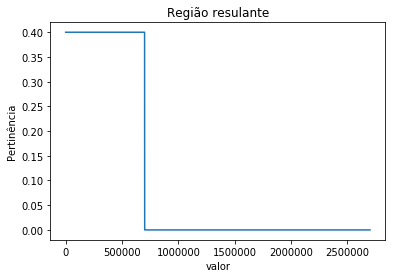

In [34]:
sistema_fuzzzy()